Praktikum Week 6
Ricky Jonathan H. T - 0706022210005


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [48]:
# Step 2: Load dataset dari URL
url = "https://raw.githubusercontent.com/Mypeepee/Dataset---Datamining/refs/heads/main/adult.csv"
data = pd.read_csv(url)  # Membaca file CSV dan memuatnya sebagai DataFrame
print("Data Sample:")
data.sample(10)

Data Sample:


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
17877,33,Local-gov,119829,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,60,United-States,<=50K
25605,63,?,186809,Bachelors,13,Married-civ-spouse,?,Husband,White,Male,0,0,30,United-States,>50K
14370,63,Private,81605,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
35892,39,Private,70240,Some-college,10,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,0,40,Philippines,<=50K
22240,29,Private,83003,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,United-States,<=50K
4017,18,?,471876,HS-grad,9,Never-married,?,Own-child,White,Female,0,0,15,United-States,<=50K
44663,20,?,195767,HS-grad,9,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
31048,39,Private,139906,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,81,United-States,<=50K
41542,50,Self-emp-inc,283676,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,60,United-States,>50K
21394,59,Federal-gov,243612,HS-grad,9,Widowed,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,<=50K


In [52]:
data['income'].replace(['<=50K', '>50K'], [0, 1], inplace=True)
data.replace('?', np.NaN, inplace=True)

<ipython-input-52-fb6f288cfc83>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['income'].replace(['<=50K', '>50K'], [0, 1], inplace=True)
<ipython-input-52-fb6f288cfc83>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['income'].replace(['<=50K', '>50K'], [0, 1], inplace=True)


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


In [54]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [55]:
# Menampilkan jumlah nilai unik dari setiap kolom
unique_counts = data.nunique()
print("Jumlah nilai unik di setiap kolom:\n", unique_counts)

# Menampilkan daftar nilai unik untuk setiap kolom (opsional)


Jumlah nilai unik di setiap kolom:
 age                   74
workclass              8
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            14
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        41
income                 2
dtype: int64


In [57]:
data.dropna(inplace=True)

In [58]:
data_cleaned = data.dropna()

print("Null values per column after dropna:\n", data_cleaned.isnull().sum())


Null values per column after dropna:
 age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


Mengecek apakah ada null value, jika ada kita drop


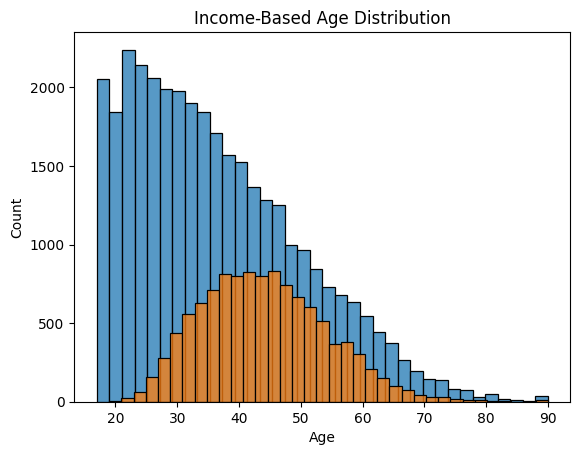

In [62]:
income_less_than_50k = data.loc[data.income == 0]
income_more_than_50k = data.loc[data.income == 1]
ax = sns.histplot(data=income_less_than_50k, x='age', binwidth=2);
ax = sns.histplot(data=income_more_than_50k, x='age', binwidth=2);
ax.set_xlabel('Age');
ax.set_title('Income-Based Age Distribution');

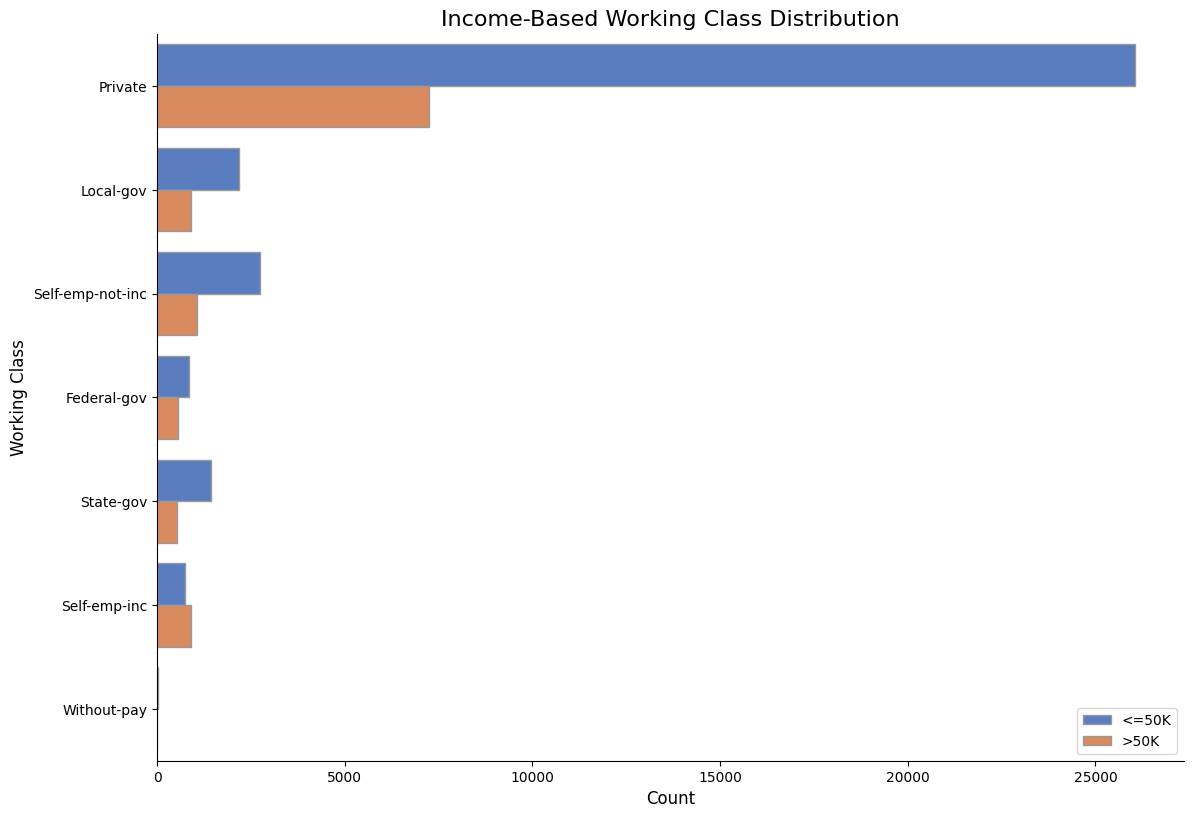

In [64]:
plot = sns.catplot(data=data, y="workclass", hue="income", kind="count",
                   palette="muted", edgecolor=".6", legend=False,
                   height=8, aspect=1.5);
plot.set_xlabels('Count', fontsize=12);
plot.set_ylabels('Working Class', fontsize=12);
plt.legend(loc='lower right', labels=['<=50K', '>50K']);
plt.title('Income-Based Working Class Distribution', fontsize=16);

In [70]:
label_encoder = LabelEncoder()

data['workclass'] = label_encoder.fit_transform(data['workclass'])
data['education'] = label_encoder.fit_transform(data['education'])
data['marital-status'] = label_encoder.fit_transform(data['marital-status'])
data['occupation'] = label_encoder.fit_transform(data['occupation'])
data['relationship'] = label_encoder.fit_transform(data['relationship'])
data['race'] = label_encoder.fit_transform(data['race'])
data['gender'] = label_encoder.fit_transform(data['gender'])
data['native-country'] = label_encoder.fit_transform(data['native-country'])

data.sample(n = 5)

# Using label encoder to encode the categorical columns (predicting variables or X)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
18404,25,2,441591,9,13,4,12,3,4,1,0,0,40,38,0
36999,46,2,233511,9,13,0,2,1,4,1,0,0,48,38,0
3810,37,2,32528,9,13,2,11,0,4,1,0,0,50,38,0
31219,53,5,246820,10,16,2,9,0,4,1,0,0,50,38,1
26942,59,2,122283,14,15,2,9,0,1,1,99999,0,40,18,1


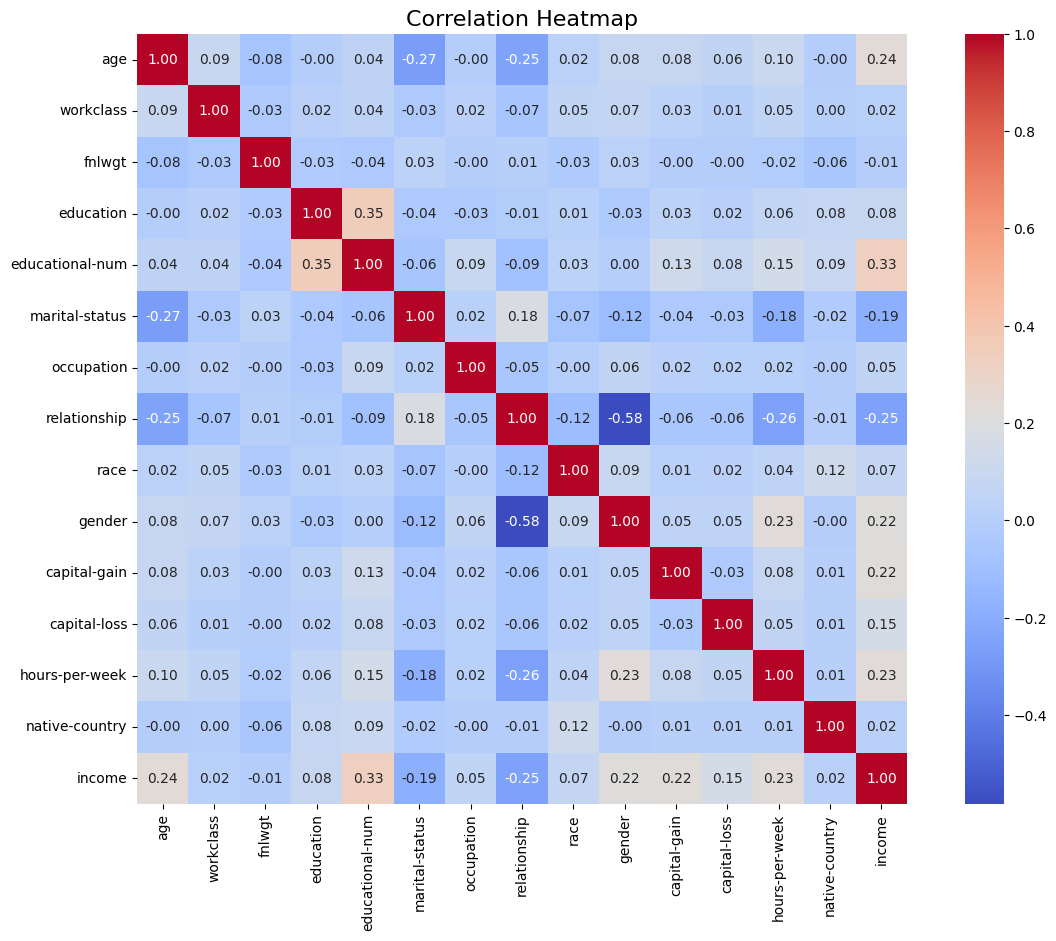

In [71]:
correlation_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [73]:
# 1. Decision Tree (Criterion Entropy) Classification

X = data.drop(['income', 'fnlwgt', 'native-country'], axis = 1)
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Next is to divide the dataset into 80% train data (for training the model), and 20% testing data.

Decision Tree


In [74]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [75]:
y_pred_en = clf_en.predict(X_test)

In [76]:

y_train_en = clf_en.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_en)
training_accuracy = accuracy_score(y_train, y_train_en)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))


Testing accuracy: 0.8385
Training accuracy: 0.8343


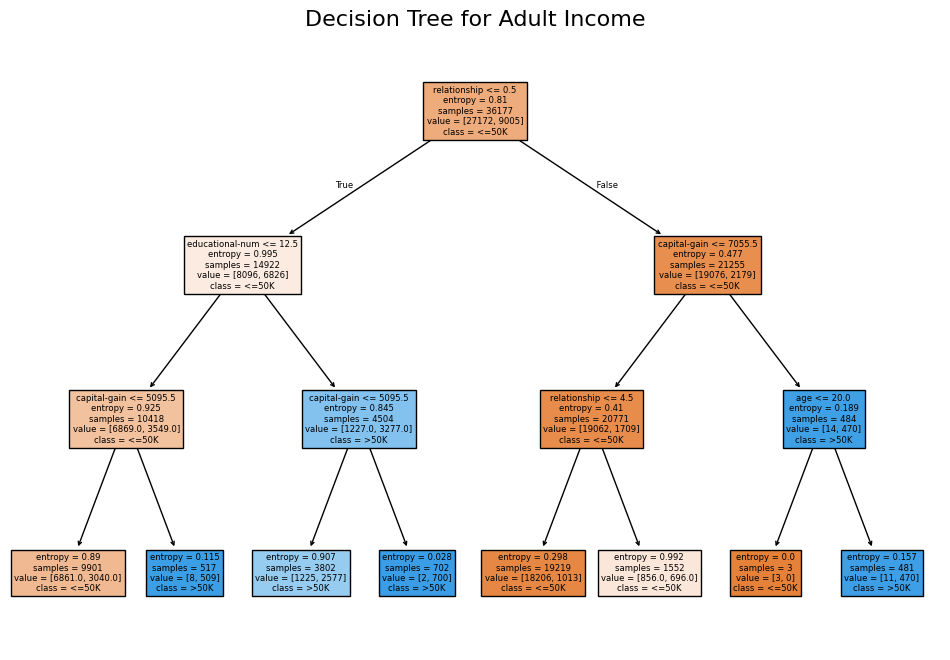

In [77]:

from sklearn import tree

plt.figure(figsize=(12, 8))
tree.plot_tree(clf_en, feature_names=X.columns, class_names=["<=50K", ">50K"], filled=True)
plt.title('Decision Tree for Adult Income', fontsize=16)
plt.show()


In [78]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
clf_gini.fit(X_train, y_train)

y_pred_gini = clf_gini.predict(X_test)
y_train_gini = clf_gini.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_gini)
training_accuracy = accuracy_score(y_train, y_train_gini)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))


Testing accuracy: 0.8385
Training accuracy: 0.8343


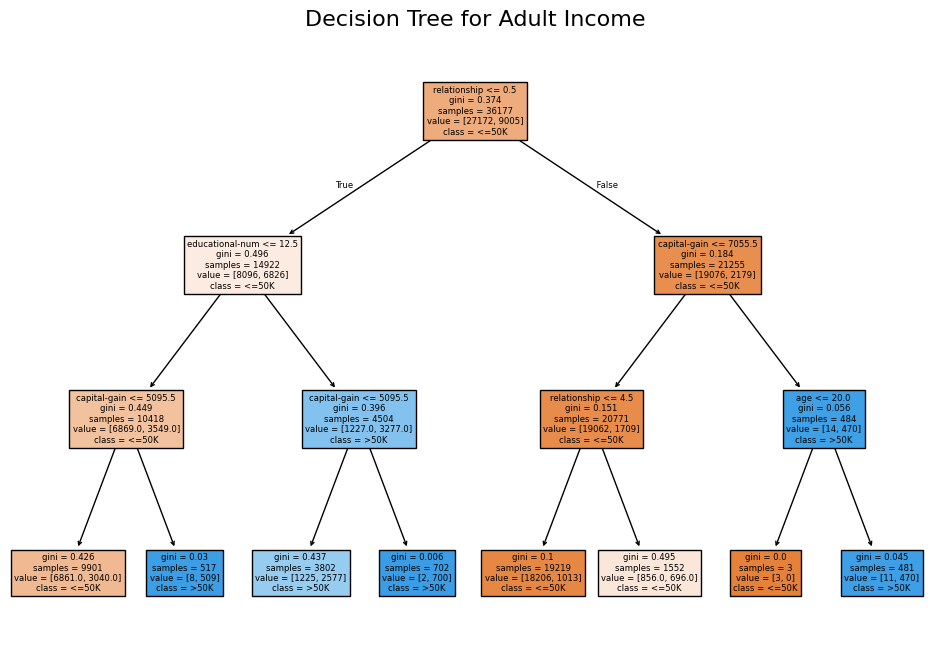

In [80]:

plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini, feature_names=X.columns, class_names=['<=50K', '>50K'], filled=True)
plt.title('Decision Tree for Adult Income', fontsize=16)
plt.show()


In [81]:
conf_matrix_en = confusion_matrix(y_test, y_pred_en)
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)

print("Confusion Matrix Entropy:\n", conf_matrix_en)
print("Confusion Matrix Gini Index:\n", conf_matrix_gini)


Confusion Matrix Entropy:
 [[6552  290]
 [1171 1032]]
Confusion Matrix Gini Index:
 [[6552  290]
 [1171 1032]]


In [82]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
y_train_nb = nb.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_nb)
training_accuracy = accuracy_score(y_train, y_train_nb)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))


Testing accuracy: 0.7967
Training accuracy: 0.7953


In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [84]:

y_pred_rf = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)

y_train_rf = nb.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_rf)
training_accuracy = accuracy_score(y_train, y_train_rf)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))


Testing accuracy: 0.8468
Training accuracy: 0.7953


In [85]:
cm_en = confusion_matrix(y_test, y_pred_en)
cm_gini = confusion_matrix(y_test, y_pred_gini)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Confusion Matrix Entropy:")
print(cm_en)
print("\nConfusion Matrix Gini:")
print(cm_gini)
print("\nConfusion Matrix Naive Bayes:")
print(cm_nb)
print("\nConfusion Matrix Random Forest:")
print(cm_rf)

Confusion Matrix Entropy:
[[6552  290]
 [1171 1032]]

Confusion Matrix Gini:
[[6552  290]
 [1171 1032]]

Confusion Matrix Naive Bayes:
[[6501  341]
 [1498  705]]

Confusion Matrix Random Forest:
[[6311  531]
 [ 855 1348]]


In [86]:



class_report_en = classification_report(y_test, y_pred_en)
class_report_gini = classification_report(y_test, y_pred_gini)
class_report_nb = classification_report(y_test, y_pred_nb)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Classification Report Entropy: \n", class_report_en)
print("Classification Report Gini Index: \n", class_report_gini)
print("Classification Report Naive Bayes: \n", class_report_nb)
print("Classification Report Random Forest: \n", class_report_rf)


# From the results above (especially accuracy), we can conclude that these 4 have similar results, all an accuracy in the range 80-86%.
# Random Forest might have the best accuracy from them all.
# Overall, all models are better at predicting people with income less than 50K, however for the ones above 50K, the most reliable will be random forest, even with not too high accuracy.
# This might happen due to more datas of people below 50K income.
# For future predictions, all four models could be used, and be compared with each other to define which is the most accurate for even further predictions.



Classification Report Entropy: 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      6842
           1       0.78      0.47      0.59      2203

    accuracy                           0.84      9045
   macro avg       0.81      0.71      0.74      9045
weighted avg       0.83      0.84      0.82      9045

Classification Report Gini Index: 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      6842
           1       0.78      0.47      0.59      2203

    accuracy                           0.84      9045
   macro avg       0.81      0.71      0.74      9045
weighted avg       0.83      0.84      0.82      9045

Classification Report Naive Bayes: 
               precision    recall  f1-score   support

           0       0.81      0.95      0.88      6842
           1       0.67      0.32      0.43      2203

    accuracy                           0.80      9045
   macro avg       0.7